## Сюй Минчуань, гр. 517, задание 8 домашки 1
- При $n = 300$ сгенерируйте при разных значениях $p\in\{0, 0.05, 0.1, 0.15, . . . , 1.0\}$ граф $G(n, p)$ в модели Эрдёша–Реньи
- Постройте график $J(G(n, p))$ в зависимости от $p$
- Найдите теоретическую оценку для среднего значения этой величины и постройте её на том же графике.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 

Testing the ER model 

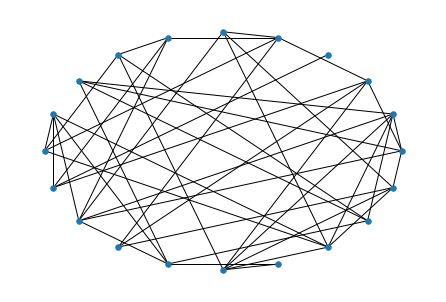

In [2]:
# the testing ER model
G = nx.erdos_renyi_graph(20, 0.2)
# the shell layout
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels = False, node_size = 30)
plt.show()

Коэффициент Жаккера для графа модели Эрдёша-Реньи:
$$
J(G) = \frac{1}{|E|}\sum_{e=(u,v)\in E} J(e) = \frac{1}{|E|}\sum_{e=(u,v)\in E} \frac{|N_u \cap N_v|}{|N_u \cup N_v|}
$$

In [3]:
# nx.jaccard_coefficient in the networkx
def jac_coeffi(G, u, v):
    union_size = len(set(G[u]) | set(G[v]))
    if union_size == 0:
        return 0
    return len(list(nx.common_neighbors(G, u, v))) / union_size

def jac_coeffi_graph(G):
    jc_g = 0
    for edge in list(G.edges()):
        u, v = edge 
        jc_g += jac_coeffi(G, u, v)
    if len(G.edges()) == 0:
        return 0
    else:
        return jc_g / len(G.edges())

In [4]:
p = np.linspace(0,1,21)
G_list = []
for p_i in p:
    G_list.append(nx.erdos_renyi_graph(300, p_i))
jac_coeff_list = []
for g in G_list:
    jac_coeff_list.append(jac_coeffi_graph(g))

Теоретическая оценка (но не очень уверен):
$$
\mathbb{E} J(G) = \frac{1}{p\cdot C_n^2} \cdot p\cdot C_n^2 \cdot \frac{p^2(n-2)+2}{p^2(n-2)+2 + 2p(1-p)(n-2) + 2} = \frac{p^2(n-2)+2}{p(2-p)(n-2)+4}
$$


In [5]:
def theo_estimate(n,p):
    if p == 0: return 0
    else:
        return (p**2 *(n-2)+2) / (p*(2-p)*(n-2) + 4)
jac_coeff_esti_list = [theo_estimate(300, p_i) for p_i in p]

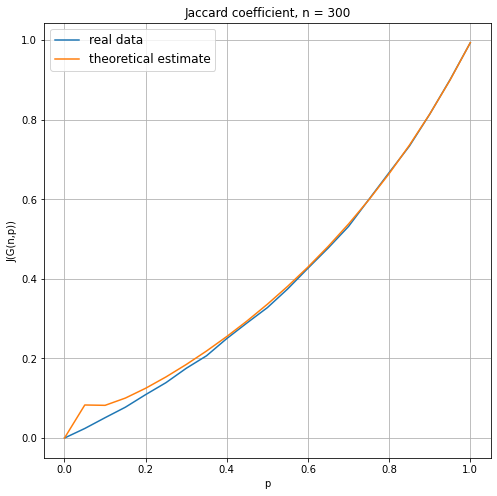

In [6]:
plt.figure(figsize=(8,8))
plt.plot(p,jac_coeff_list, label = "real data")
plt.plot(p,jac_coeff_esti_list, label = "theoretical estimate")
plt.xlabel("p")
plt.ylabel("J(G(n,p))")
plt.title("Jaccard coefficient, n = 300")
plt.legend(fontsize = 'large')
plt.grid()
plt.show()